# SALES FORECAST

It is determining present-day or future sales using data like past sales, seasonality, festivities, economic conditions, etc.

So, this model will predict sales on a certain day after being provided with a certain set of inputs.

In this model 8 parameters were used as input:

* past seven day sales
* day of the week
* date – the date was transformed into 3 different inputs
* season
* Festival or not
* sales on the same day in the previous year

### How doe it work

First, all inputs are preprocessed to be understandable by the machine. This is a linear regression model based on supervised learning, so the output will be provided along with the input. Then inputs are then fed to the model along with desired output. The model will plot(learn) a relation(function) between the input and output. This function or relation is then used to predict the output for a specific set of inputs. In this case, input parameters like date and previous sales are labeled as input, and the amount of sales is marked as output. The model will predict a number between 0 and 1 as a sigmoid function is used in the last layer. This output can be multiplied by a specific number(in this case, maximum sales), this will be our corresponding sales amount for a certain day. This output is then provided as input to calculate sales data for the next day. This cycle of steps will be continued until a certain date arrives.


## Required packages and Installation

* numpy
* pandas
* keras
* tensorflow
* csv
* matplotlib.pyplot

## Step 1: Import the required libraries and dataset.

The dataset I chose for this exercise or program is in the form of CSV so, I used pd.read_csv from the panda's module as shown in the picture below dataset contains 4 columns named TV, radio, newspaper, and sales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/asus/Downloads/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Step 2: Check for null values in the dataset and data inspection.

After the extraction of data, it’s time to check the dataset for null values and duplicate values.


In [3]:
pd.DataFrame(df.isnull().sum(),columns=['Count of Null Values']).T

,TV,Radio,Newspaper,Sales
Count of Null Values,0,0,0,0


In [4]:
df.describe(include='all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Step 3: Exploratory Data Analysis (EDA).

In [6]:
a = df['TV']
b = df['Sales']

<AxesSubplot:title={'center':'Scatterplot between TV and Sales(EDA)'}, xlabel='TV', ylabel='Sales'>

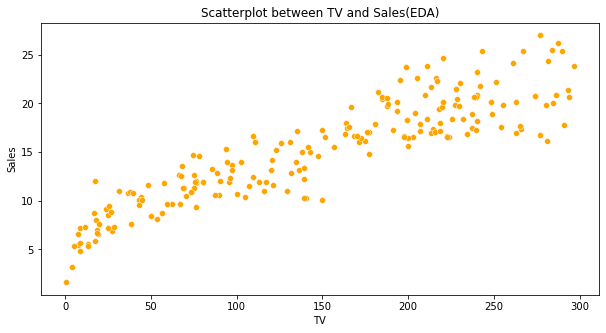

In [7]:
plt.figure(figsize=(10,5))
plt.title('Scatterplot between TV and Sales(EDA)')
sns.scatterplot(a,b,color='orange')

<AxesSubplot:title={'center':'Scatterplot between Radio and Sales(EDA)'}, xlabel='Radio', ylabel='Sales'>

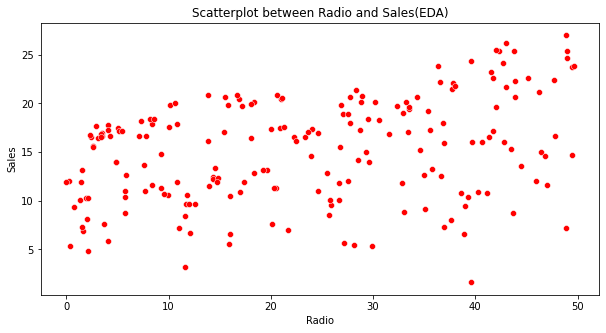

In [8]:
a = df['Radio']
b = df['Sales']
plt.figure(figsize=(10,5))
plt.title('Scatterplot between Radio and Sales(EDA)')
sns.scatterplot(x=a,y=b,color='red')

<AxesSubplot:title={'center':'Scatterplot between Newspaper and Sales(EDA)'}, xlabel='Newspaper', ylabel='Sales'>

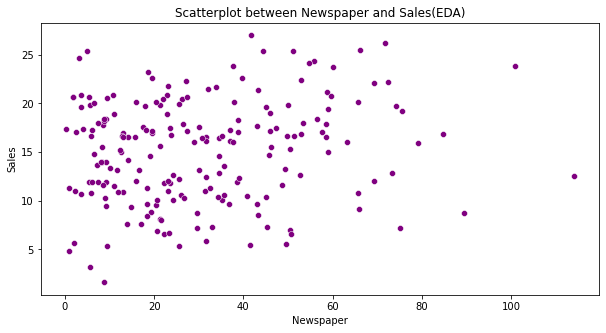

In [9]:
a = df['Newspaper']
b = df['Sales']
plt.figure(figsize=(10,5))
plt.title('Scatterplot between Newspaper and Sales(EDA)')
sns.scatterplot(x=a,y=b,color='purple')

## Distplot:

Displot is used to represent the univariate distribution of data(involving one variate or variable quantity) against the density.

Text(0.5, 1.0, 'Distplot for TV')

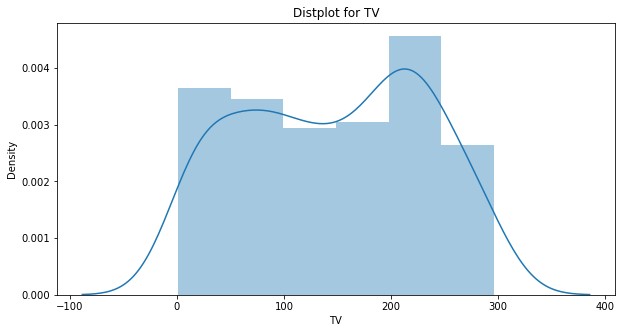

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(df['TV'])
plt.title('Distplot for TV')

Text(0.5, 1.0, 'Distplot for Radio')

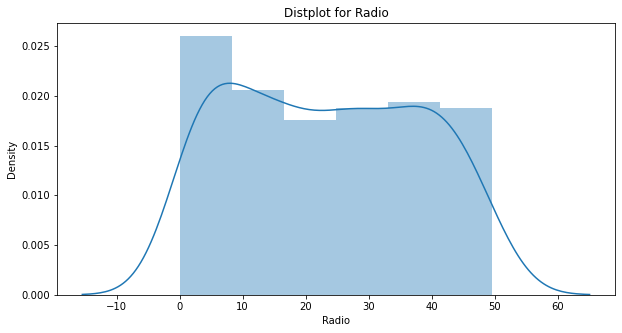

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(df['Radio'])
plt.title('Distplot for Radio')

Text(0.5, 1.0, 'Distplot for Newspaper')

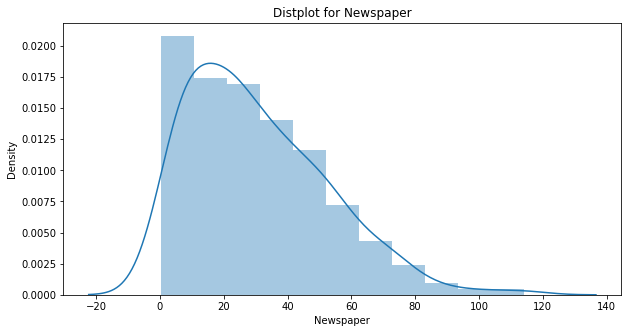

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(df['Newspaper'])
plt.title('Distplot for Newspaper')

Text(0.5, 1.0, 'Distplot for Sales')

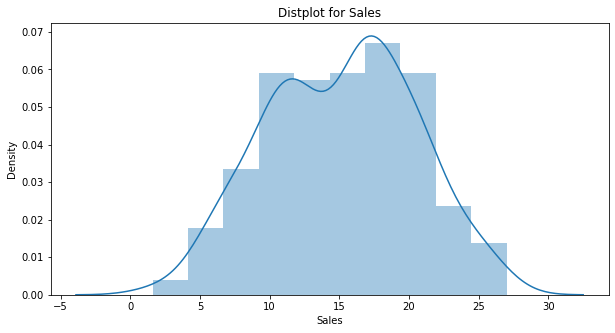

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(df['Sales'])
plt.title('Distplot for Sales')

Text(0.5, 1.0, 'Pair plot between TV, radio, and newspaper with respect to sales')

<Figure size 720x360 with 0 Axes>

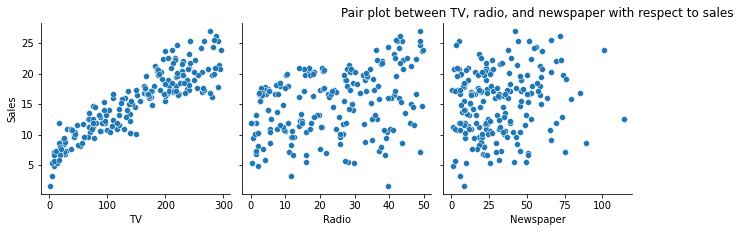

In [14]:
plt.figure(figsize=(10,5))
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],height=3,aspect=1)
plt.title('Pair plot between TV, radio, and newspaper with respect to sales')

Text(0.5, 1.0, 'Heatmap (EDA)')

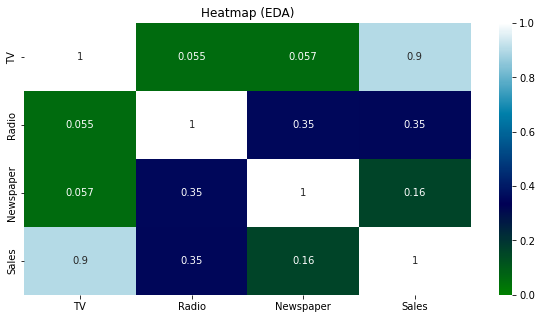

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')
plt.title('Heatmap (EDA)')

## Step 4: Statistical Tasks

## Standard Deviation

Standard Deviation(std) is a function used to depict how much variation is from the mean.

In [16]:
df.std()

TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.283892
dtype: float64

## Correlation

Correlation(corr) is a function used to identify the relationship between the variables.

In [17]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


## Variance

Variance(var) is a function used to check the dispersion that takes into account the spread of all data points in a data set.

In [18]:
df.var()

TV           7370.949893
Radio         220.427743
Newspaper     474.308326
Sales          27.919517
dtype: float64

## Mean

Mean returns the average of the dataset.

In [19]:
df.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
dtype: float64

## Median

The median calculates the middle value of the dataset.

In [20]:
df.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         16.00
dtype: float64

## Step 5: Linear regression model building and prediction.

In [21]:
x = df[['TV']]
y = df['Sales']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 50, test_size = 0.2)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
lr.intercept_

6.889929307794299

In [25]:
lr.coef_

array([0.05671244])

### Model Building and splitting dataset.

In [26]:
print('The LR model is: Y =',lr.intercept_,'+', lr.coef_,'Radio')

The LR model is: Y = 6.889929307794299 + [0.05671244] Radio


In [27]:
lr.score(x_train,y_train)

0.822322146620674

In [28]:
lr.score(x_test, y_test)

0.7281236097879917

In [29]:
y_pred = lr.predict(x_test)
y_pred

array([16.85430492, 20.18899637,  8.23968537, 14.22851898, 12.34566599,
       19.27592609, 20.05288651,  7.37765629, 19.82036551, 11.89763771,
       20.48957229, 16.9280311 , 19.18518619, 16.67282512, 21.79962965,
       14.55745113, 13.75213448, 19.83737924,  9.32856421, 14.35895759,
       13.11695516, 11.160376  , 10.42311429, 19.50277585, 22.41212399,
       10.76906017, 12.01673384, 12.31730977, 17.37605937, 18.61806179,
       13.87123061, 15.38545274,  7.84836953, 18.09630735, 11.22275968,
        9.42497535, 12.71429684, 21.78828716, 11.83525403, 11.22275968])

### Linear Regression output for test and train data.

In [30]:
diff = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
diff.head()

,Actual,Predicted
112,17.1,16.854305
165,16.9,20.188996
12,9.2,8.239685
73,11.0,14.228519
144,12.3,12.345666


### Difference between actual data and predicted data

In [31]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [32]:
R2 = r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [33]:
print("Accuracy =",R2.round(2)*100,"%")
print("Mean Absolute Error=",mae.round(2))
print("Mean Squared Error",mse.round(2))

Accuracy = 73.0 %
Mean Absolute Error= 1.74
Mean Squared Error 4.66


### Accuracy of linear regression on the dataset.

Text(0.5, 1.0, 'Regression graph')

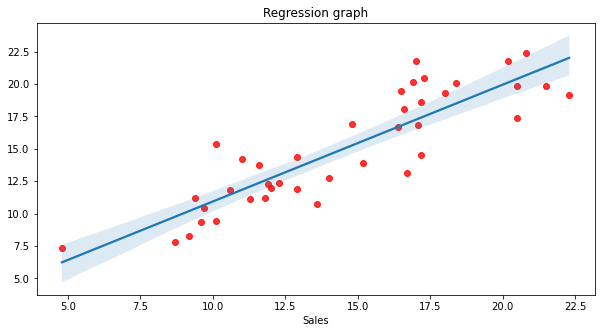

In [34]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'red'})
plt.title('Regression graph')

The linear regression graph is created by train data and the model line is shown by the blue line which is created using test data and predicted data as we can see most of the red dots are on the line, thus we can say that model has produced the best-fit line.